In [2]:
import ROOT as R
from analysis_branch import *
from util import *
import ctypes

In [3]:
R.EnableImplicitMT()

In [70]:
root_file = 'Histos_used_for_BKGNorm_2016.root'

In [43]:
fin = R.TFile(root_file,"READ")
h_Data_3b = fin.Get('Data_SB_3B_Z_High_V_mass_Z')
h_DY_3b = fin.Get('DY_SB_3B_Z_High_V_mass_Z')
h_Other_3b = fin.Get('Other_SB_3B_Z_High_V_mass_Z')
h_TT_3b = fin.Get('TT_SB_3B_Z_High_V_mass_Z')
h_TTBB_3b = fin.Get('TTBB_SB_3B_Z_High_V_mass_Z')

In [44]:
hs = R.THStack("stack","V_mass_Z")

hs.Add(h_Other_3b)
h_Other_3b.SetFillColor(800)

hs.Add(h_TTBB_3b)
h_TTBB_3b.SetFillColor(432)

hs.Add(h_TT_3b)
h_TT_3b.SetFillColor(600)

hs.Add(h_DY_3b)
h_DY_3b.SetFillColor(400)

h_Data_3b.SetMarkerSize(1)
h_Data_3b.SetMarkerStyle(20)
h_Data_3b.Sumw2()

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


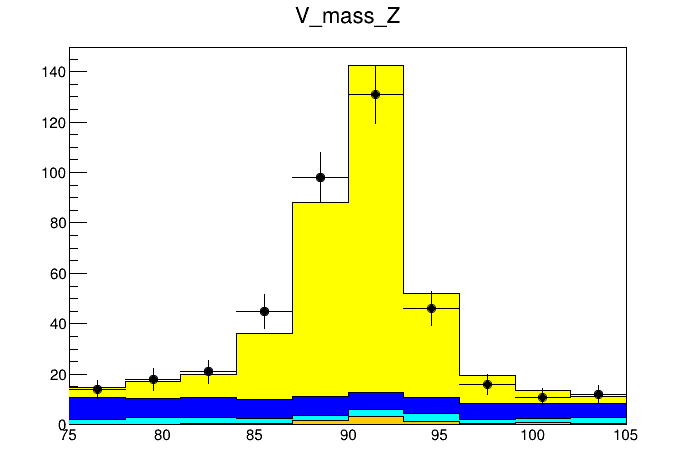

In [45]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_3b.Draw('SAME')
hs.Draw('histSAME')
h_Data_3b.Draw('SAME')
c.Draw()

In [46]:
h_Data_3b_for_fit = h_Data_3b - h_Other_3b
# h_Data_3b_for_fit = h_Data_3b
h_TT_3b_for_fit = h_TTBB_3b + h_TT_3b

hs = R.THStack("stack","V_mass_Z")

hs.Add(h_TT_3b_for_fit)
h_TT_3b_for_fit.SetFillColor(600)
hs.Add(h_DY_3b)
h_DY_3b.SetFillColor(400)



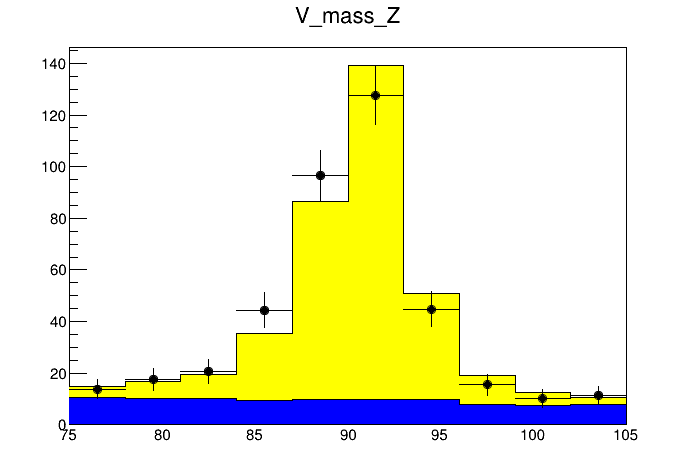

In [47]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_3b_for_fit.Draw('SAME')
hs.Draw('histSAME')
h_Data_3b_for_fit.Draw('SAME')
c.Draw()

fit status: 
****************************************
Minimizer is Minuit / Migrad
MinFCN                    =     -2320.06
NDf                       =            0
Edm                       =  4.74636e-08
NCalls                    =           90
TT+TTBB                   =     0.231784   +/-   0.0632742    	 (limited)
DY                        =     0.768206   +/-   0.0815065    	 (limited)

 **********
 **   31 **SET PRINT           0
 **********
 **********
 **   32 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 TT+TTBB      1.00000e+00  1.00000e-04    0.00000e+00  3.00000e+00
     2 DY           1.00000e+00  1.00000e-04    0.00000e+00  3.00000e+00
 **********
 **   33 **SET ERR         0.5
 **********
 **********
 **   34 **SET PRINT           0
 **********
 **********
 **   35 **SET STR           1
 **********
 **********
 **   36 **MIGRAD        1220        0.01
 **********
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRA

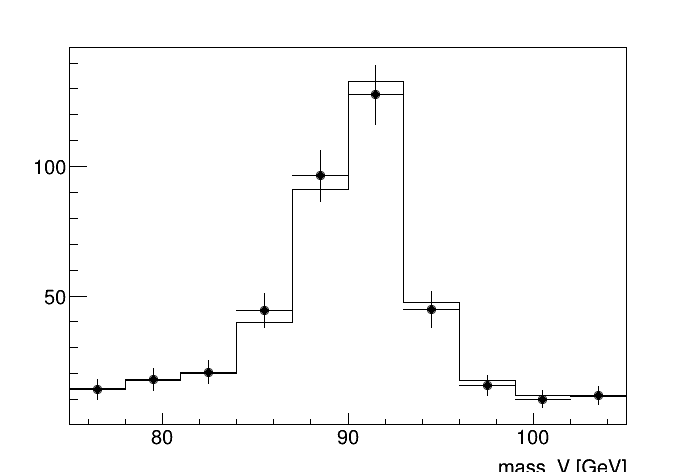

In [48]:
mc = R.TObjArray(2)
mc.Add(h_TT_3b_for_fit)
mc.Add(h_DY_3b)
data = h_Data_3b_for_fit
fit = R.TFractionFitter(data, mc)
fitter = fit.GetFitter()
fitter.Config().ParSettings(0).Set('TT+TTBB', 1.0, 0.0001, 0.0, 3.0)
fitter.Config().ParSettings(1).Set('DY', 1.0, 0.0001, 0.0, 3.0)

# fit.SetRangeX(1,8)
status = fit.Fit()
print("fit status: "+str(status))
if status == 0:
    result = fit.GetPlot()
    c = R.TCanvas()
    R.gStyle.SetOptStat(0000)
    data.Draw("Ep")
    result.Draw("same")
    c.Draw()

SF_0 = ctypes.c_double(0.)
ERR_0 = ctypes.c_double(0.)

SF_1 = ctypes.c_double(0.)
ERR_1 = ctypes.c_double(0.)

fit.GetResult(0, SF_0, ERR_0)
fit.GetResult(1, SF_1, ERR_1)


In [49]:
test_TT_hist_new = fit.GetMCPrediction(0)
test_DY_hist_new = fit.GetMCPrediction(1)

print(SF_0.value * data.Integral()/test_TT_hist_new.Integral())
print(SF_1.value * data.Integral()/test_DY_hist_new.Integral())
print(ERR_0.value * data.Integral()/test_TT_hist_new.Integral())
print(ERR_1.value * data.Integral()/test_DY_hist_new.Integral())

sf_0 = SF_0.value * data.Integral()/test_TT_hist_new.Integral()
sf_1 = SF_1.value * data.Integral()/test_DY_hist_new.Integral()

1.003785600614182
0.9893223150722679
0.27402159603463394
0.10496697717471898


In [50]:
hs = R.THStack("stack","V_mass_Z")

hs.Add(h_Other_3b)
h_Other_3b.SetFillColor(800)

hs.Add(h_TTBB_3b*sf_0)
h_TTBB_3b.SetFillColor(432)

hs.Add(h_TT_3b*sf_0)
h_TT_3b.SetFillColor(600)

hs.Add(h_DY_3b*sf_1)
h_DY_3b.SetFillColor(400)

h_Data_3b.SetMarkerSize(1)
h_Data_3b.SetMarkerStyle(20)
h_Data_3b.Sumw2()

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


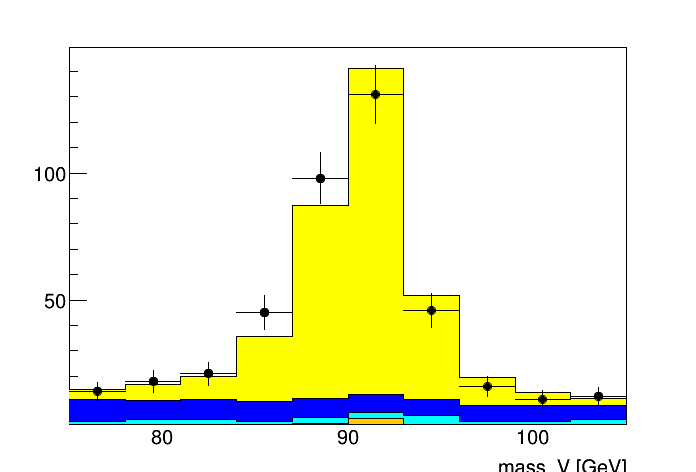

In [51]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
h_Data_3b.Draw()
hs.Draw('histSAME')
h_Data_3b.Draw('SAME')
hs.Draw('histSAME')
h_Data_3b.Draw('SAME')
c.Draw()

In [52]:
fin = R.TFile(root_file,"READ")
h_Data_3b = fin.Get('Data_SB_3B_Z_SM_V_mass_Z')
h_DY_3b = fin.Get('DY_SB_3B_Z_SM_V_mass_Z')
h_Other_3b = fin.Get('Other_SB_3B_Z_SM_V_mass_Z')
h_TT_3b = fin.Get('TT_SB_3B_Z_SM_V_mass_Z')
h_TTBB_3b = fin.Get('TTBB_SB_3B_Z_SM_V_mass_Z')

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


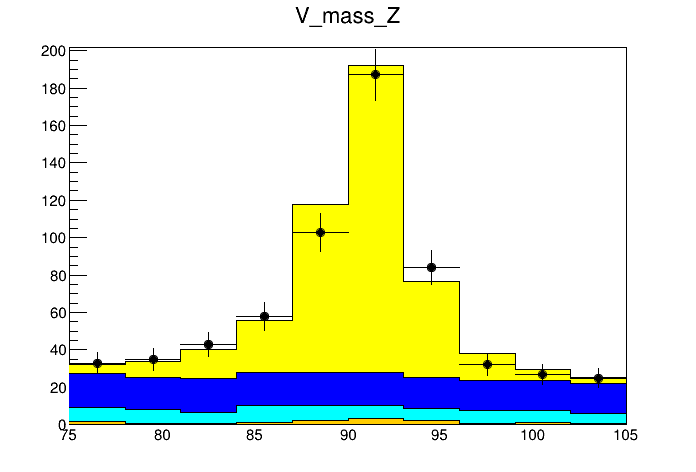

In [53]:
hs = R.THStack("stack","V_mass_Z")

hs.Add(h_Other_3b)
h_Other_3b.SetFillColor(800)

hs.Add(h_TTBB_3b)
h_TTBB_3b.SetFillColor(432)

hs.Add(h_TT_3b)
h_TT_3b.SetFillColor(600)

hs.Add(h_DY_3b)
h_DY_3b.SetFillColor(400)

h_Data_3b.SetMarkerSize(1)
h_Data_3b.SetMarkerStyle(20)
h_Data_3b.Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_3b.Draw('SAME')
hs.Draw('histSAME')
h_Data_3b.Draw('SAME')
c.Draw()

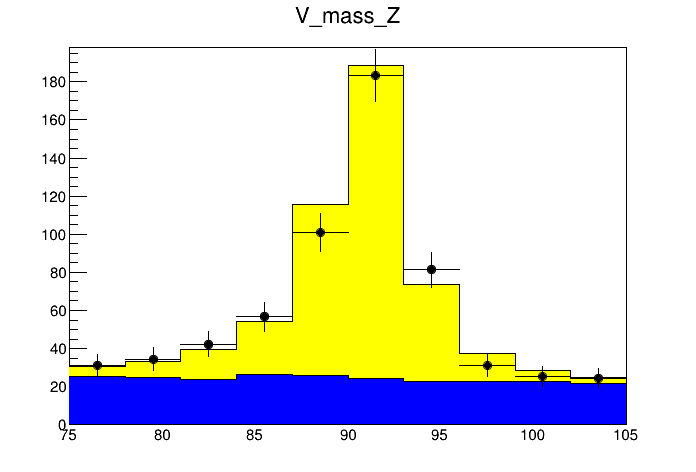

In [54]:
h_Data_3b_for_fit = h_Data_3b - h_Other_3b
# h_Data_3b_for_fit = h_Data_3b

h_TT_3b_for_fit = h_TTBB_3b + h_TT_3b

hs = R.THStack("stack","V_mass_Z")

hs.Add(h_TT_3b_for_fit)
h_TT_3b_for_fit.SetFillColor(600)
hs.Add(h_DY_3b)
h_DY_3b.SetFillColor(400)

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_3b_for_fit.Draw('SAME')
hs.Draw('histSAME')
h_Data_3b_for_fit.Draw('SAME')
c.Draw()

fit status: 
****************************************
Minimizer is Minuit / Migrad
MinFCN                    =     -3851.28
NDf                       =            0
Edm                       =  2.25552e-09
NCalls                    =           68
TT+TTBB                   =     0.396277   +/-   0.0581108    	 (limited)
DY                        =      0.60372   +/-   0.063309     	 (limited)

 **********
 **   37 **SET PRINT           0
 **********
 **********
 **   38 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 TT+TTBB      1.00000e+00  1.00000e-04    0.00000e+00  3.00000e+00
     2 DY           1.00000e+00  1.00000e-04    0.00000e+00  3.00000e+00
 **********
 **   39 **SET ERR         0.5
 **********
 **********
 **   40 **SET PRINT           0
 **********
 **********
 **   41 **SET STR           1
 **********
 **********
 **   42 **MIGRAD        1220        0.01
 **********
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRA

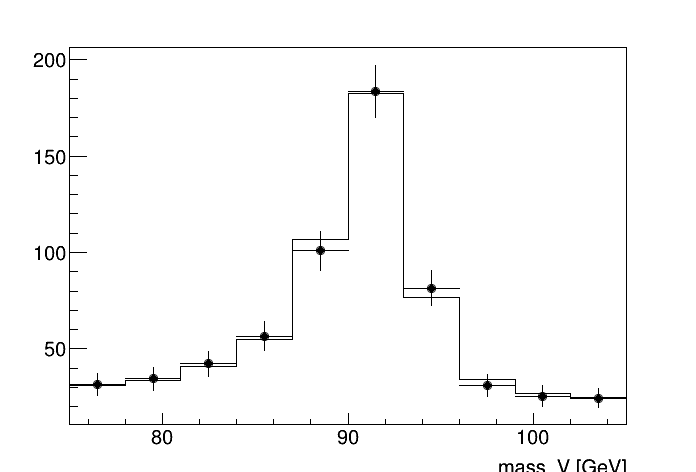

In [55]:
mc = R.TObjArray(2)
mc.Add(h_TT_3b_for_fit)
mc.Add(h_DY_3b)
data = h_Data_3b_for_fit
fit = R.TFractionFitter(data, mc)
fitter = fit.GetFitter()
fitter.Config().ParSettings(0).Set('TT+TTBB', 1.0, 0.0001, 0.0, 3.0)
fitter.Config().ParSettings(1).Set('DY', 1.0, 0.0001, 0.0, 3.0)

# fit.SetRangeX(1,8)
status = fit.Fit()
print("fit status: "+str(status))
if status == 0:
    result = fit.GetPlot()
    c = R.TCanvas()
    R.gStyle.SetOptStat(0000)
    data.Draw("Ep")
    result.Draw("same")
    c.Draw()

SF_0 = ctypes.c_double(0.)
ERR_0 = ctypes.c_double(0.)

SF_1 = ctypes.c_double(0.)
ERR_1 = ctypes.c_double(0.)

fit.GetResult(0, SF_0, ERR_0)
fit.GetResult(1, SF_1, ERR_1)


test_TT_hist_new = fit.GetMCPrediction(0)
test_DY_hist_new = fit.GetMCPrediction(1)


1.006976981564217
0.9572997906779195
0.14766476484490082
0.10038704429530976


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


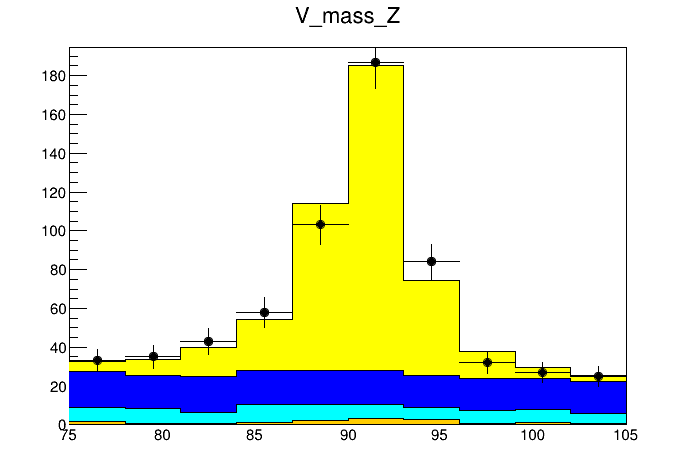

In [56]:
print(SF_0.value * data.Integral()/test_TT_hist_new.Integral())
print(SF_1.value * data.Integral()/test_DY_hist_new.Integral())
print(ERR_0.value * data.Integral()/test_TT_hist_new.Integral())
print(ERR_1.value * data.Integral()/test_DY_hist_new.Integral())

sf_0 = SF_0.value * data.Integral()/test_TT_hist_new.Integral()
sf_1 = SF_1.value * data.Integral()/test_DY_hist_new.Integral()

hs = R.THStack("stack","V_mass_Z")

hs.Add(h_Other_3b)
h_Other_3b.SetFillColor(800)

hs.Add(h_TTBB_3b*sf_0)
h_TTBB_3b.SetFillColor(432)

hs.Add(h_TT_3b*sf_0)
h_TT_3b.SetFillColor(600)

hs.Add(h_DY_3b*sf_1)
h_DY_3b.SetFillColor(400)

h_Data_3b.SetMarkerSize(1)
h_Data_3b.SetMarkerStyle(20)
h_Data_3b.Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_3b.Draw('SAME')
hs.Draw('histSAME')
h_Data_3b.Draw('SAME')
c.Draw()

In [76]:
fin = R.TFile(root_file,"READ")
h_Data_4b = fin.Get('Data_SB_4B_Z_SM_V_mass_Z')
h_DY_4b = fin.Get('DY_SB_4B_Z_SM_V_mass_Z')
h_Other_4b = fin.Get('Other_SB_4B_Z_SM_V_mass_Z')
h_TT_4b = fin.Get('TT_SB_4B_Z_SM_V_mass_Z')
h_TTBB_4b = fin.Get('TTBB_SB_4B_Z_SM_V_mass_Z')

In [77]:
h_Data_4b.Rebin(2)
h_DY_4b.Rebin(2)
h_Other_4b.Rebin(2)
h_TT_4b.Rebin(2)
h_TTBB_4b.Rebin(2)

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


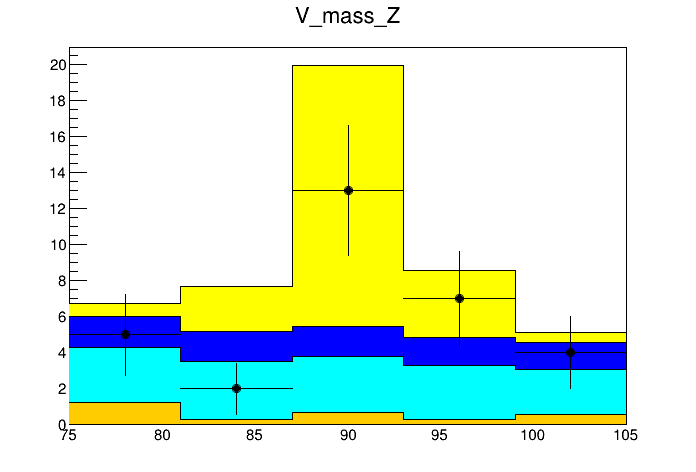

In [78]:
hs = R.THStack("stack","V_mass_Z")

hs.Add(h_Other_4b)
h_Other_4b.SetFillColor(800)

hs.Add(h_TTBB_4b)
h_TTBB_4b.SetFillColor(432)

hs.Add(h_TT_4b)
h_TT_4b.SetFillColor(600)

hs.Add(h_DY_4b)
h_DY_4b.SetFillColor(400)

h_Data_4b.SetMarkerSize(1)
h_Data_4b.SetMarkerStyle(20)
h_Data_4b.Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_4b.Draw('SAME')
hs.Draw('histSAME')
h_Data_4b.Draw('SAME')
c.Draw()

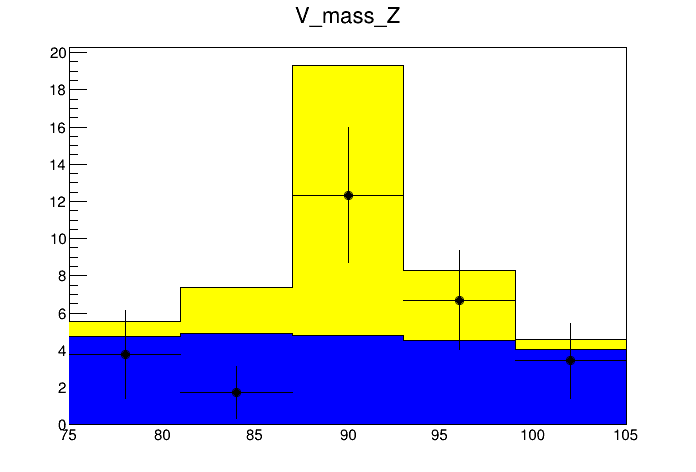

In [79]:
h_Data_4b_for_fit = h_Data_4b - h_Other_4b
# h_Data_4b_for_fit = h_Data_4b

h_TT_4b_for_fit = h_TTBB_4b + h_TT_4b

hs = R.THStack("stack","V_mass_Z")

hs.Add(h_TT_4b_for_fit)
h_TT_4b_for_fit.SetFillColor(600)
hs.Add(h_DY_4b)
h_DY_4b.SetFillColor(400)

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_4b_for_fit.Draw('SAME')
hs.Draw('histSAME')
h_Data_4b_for_fit.Draw('SAME')
c.Draw()

fit status: 
****************************************
Minimizer is Minuit / Migrad
MinFCN                    =     -60.7325
NDf                       =            0
Edm                       =  1.49571e-07
NCalls                    =           29
TT+TTBB                   =      0.50002   +/-   0.313574     	 (limited)
DY                        =     0.500001   +/-   0.344773     	 (limited)

 **********
 **   61 **SET PRINT           0
 **********
 **********
 **   62 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 TT+TTBB      1.00000e+00  1.00000e-04    5.00000e-01  2.00000e+00
     2 DY           1.00000e+00  1.00000e-04    5.00000e-01  2.00000e+00
 **********
 **   63 **SET ERR         0.5
 **********
 **********
 **   64 **SET PRINT           0
 **********
 **********
 **   65 **SET STR           1
 **********
 **********
 **   66 **MIGRAD        1220        0.01
 **********
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRA

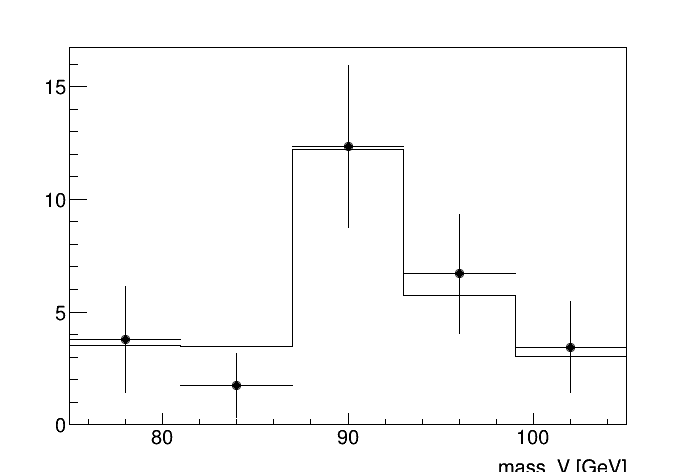

In [80]:
mc = R.TObjArray(2)
mc.Add(h_TT_4b_for_fit)
mc.Add(h_DY_4b)
data = h_Data_4b_for_fit
fit = R.TFractionFitter(data, mc)
fitter = fit.GetFitter()
fitter.Config().ParSettings(0).Set('TT+TTBB', 1.0, 0.0001, 0.5, 2.0)
fitter.Config().ParSettings(1).Set('DY', 1.0, 0.0001, 0.5, 2.0)

# fit.SetRangeX(1,8)
status = fit.Fit()
print("fit status: "+str(status))
if status == 0:
    result = fit.GetPlot()
    c = R.TCanvas()
    R.gStyle.SetOptStat(0000)
    data.Draw("Ep")
    result.Draw("same")
    c.Draw()

SF_0 = ctypes.c_double(0.)
ERR_0 = ctypes.c_double(0.)

SF_1 = ctypes.c_double(0.)
ERR_1 = ctypes.c_double(0.)

fit.GetResult(0, SF_0, ERR_0)
fit.GetResult(1, SF_1, ERR_1)


test_TT_hist_new = fit.GetMCPrediction(0)
test_DY_hist_new = fit.GetMCPrediction(1)


0.6086549697942826
0.632654390739837
0.38170104072905103
0.43624320485294255


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


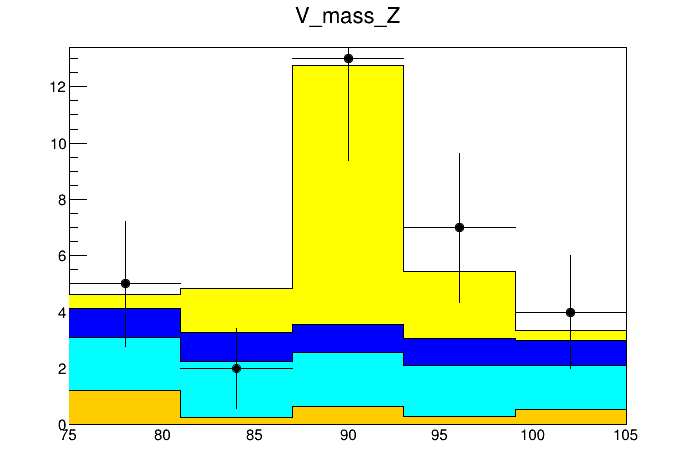

In [81]:
print(SF_0.value * data.Integral()/test_TT_hist_new.Integral())
print(SF_1.value * data.Integral()/test_DY_hist_new.Integral())
print(ERR_0.value * data.Integral()/test_TT_hist_new.Integral())
print(ERR_1.value * data.Integral()/test_DY_hist_new.Integral())

sf_0 = SF_0.value * data.Integral()/test_TT_hist_new.Integral()
sf_1 = SF_1.value * data.Integral()/test_DY_hist_new.Integral()

hs = R.THStack("stack","V_mass_Z")

hs.Add(h_Other_4b)
h_Other_4b.SetFillColor(800)

hs.Add(h_TTBB_4b*sf_0)
h_TTBB_4b.SetFillColor(432)

hs.Add(h_TT_4b*sf_0)
h_TT_4b.SetFillColor(600)

hs.Add(h_DY_4b*sf_1)
h_DY_4b.SetFillColor(400)

h_Data_4b.SetMarkerSize(1)
h_Data_4b.SetMarkerStyle(20)
h_Data_4b.Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_4b.Draw('SAME')
hs.Draw('histSAME')
h_Data_4b.Draw('SAME')
c.Draw()

In [82]:
fin = R.TFile(root_file,"READ")
h_Data_4b = fin.Get('Data_SB_4B_Z_High_V_mass_Z')
h_DY_4b = fin.Get('DY_SB_4B_Z_High_V_mass_Z')
h_Other_4b = fin.Get('Other_SB_4B_Z_High_V_mass_Z')
h_TT_4b = fin.Get('TT_SB_4B_Z_High_V_mass_Z')
h_TTBB_4b = fin.Get('TTBB_SB_4B_Z_High_V_mass_Z')

In [32]:
h_Data_4b.Rebin(3)
h_DY_4b.Rebin(3)
h_Other_4b.Rebin(3)
h_TT_4b.Rebin(3)
h_TTBB_4b.Rebin(3)

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


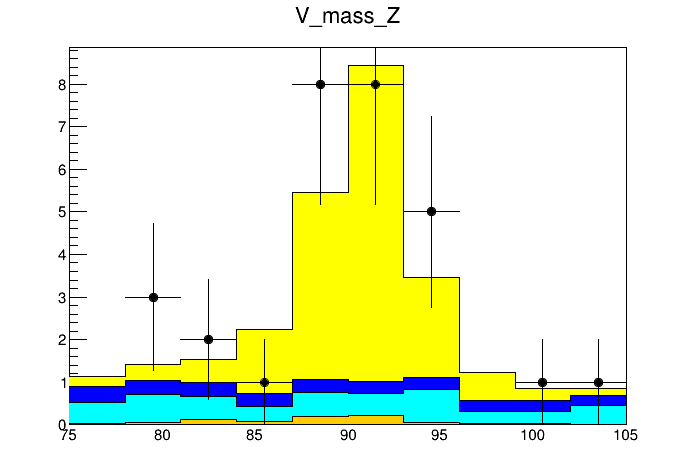

In [83]:
hs = R.THStack("stack","V_mass_Z")

hs.Add(h_Other_4b)
h_Other_4b.SetFillColor(800)

hs.Add(h_TTBB_4b)
h_TTBB_4b.SetFillColor(432)

hs.Add(h_TT_4b)
h_TT_4b.SetFillColor(600)

hs.Add(h_DY_4b)
h_DY_4b.SetFillColor(400)

h_Data_4b.SetMarkerSize(1)
h_Data_4b.SetMarkerStyle(20)
h_Data_4b.Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_4b.Draw('SAME')
hs.Draw('histSAME')
h_Data_4b.Draw('SAME')
c.Draw()

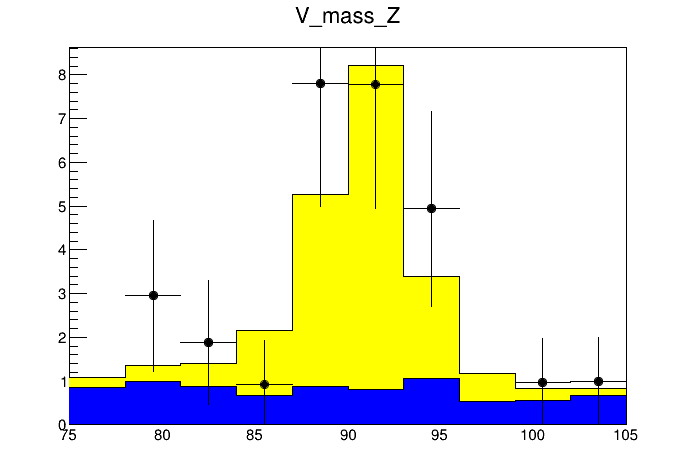

In [84]:
h_Data_4b_for_fit = h_Data_4b - h_Other_4b
# h_Data_4b_for_fit = h_Data_4b

h_TT_4b_for_fit = h_TTBB_4b + h_TT_4b

hs = R.THStack("stack","V_mass_Z")

hs.Add(h_TT_4b_for_fit)
h_TT_4b_for_fit.SetFillColor(600)
hs.Add(h_DY_4b)
h_DY_4b.SetFillColor(400)

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
h_Data_4b_for_fit.Draw('SAME')
hs.Draw('histSAME')
h_Data_4b_for_fit.Draw('SAME')
c.Draw()

fit status: 
****************************************
Minimizer is Minuit / Migrad
MinFCN                    =     -7.80132
NDf                       =            0
Edm                       =  2.69073e-08
NCalls                    =           64
TT+TTBB                   =          0.5   +/-   0.932134     	 (limited)
DY                        =     0.564591   +/-   0.240271     	 (limited)

 **********
 **   67 **SET PRINT           0
 **********
 **********
 **   68 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 TT+TTBB      1.00000e+00  1.00000e-04    5.00000e-01  2.00000e+00
     2 DY           1.00000e+00  1.00000e-04    5.00000e-01  2.00000e+00
 **********
 **   69 **SET ERR         0.5
 **********
 **********
 **   70 **SET PRINT           0
 **********
 **********
 **   71 **SET STR           1
 **********
 **********
 **   72 **MIGRAD        1220        0.01
 **********
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRA

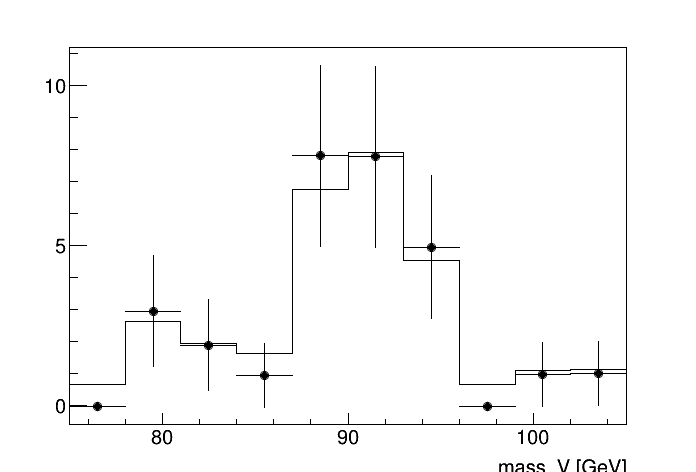

In [85]:
mc = R.TObjArray(2)
mc.Add(h_TT_4b_for_fit)
mc.Add(h_DY_4b)
data = h_Data_4b_for_fit
fit = R.TFractionFitter(data, mc)
fitter = fit.GetFitter()
fitter.Config().ParSettings(0).Set('TT+TTBB', 1.0, 0.0001, 0.5, 2.0)
fitter.Config().ParSettings(1).Set('DY', 1.0, 0.0001, 0.5, 2.0)

# fit.SetRangeX(1,8)
status = fit.Fit()
print("fit status: "+str(status))
if status == 0:
    result = fit.GetPlot()
    c = R.TCanvas()
    R.gStyle.SetOptStat(0000)
    data.Draw("Ep")
    result.Draw("same")
    c.Draw()

SF_0 = ctypes.c_double(0.)
ERR_0 = ctypes.c_double(0.)

SF_1 = ctypes.c_double(0.)
ERR_1 = ctypes.c_double(0.)

fit.GetResult(0, SF_0, ERR_0)
fit.GetResult(1, SF_1, ERR_1)


test_TT_hist_new = fit.GetMCPrediction(0)
test_DY_hist_new = fit.GetMCPrediction(1)


1.941013025161123
0.8889711359001609
3.6185689243548502
0.3783166789816394


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


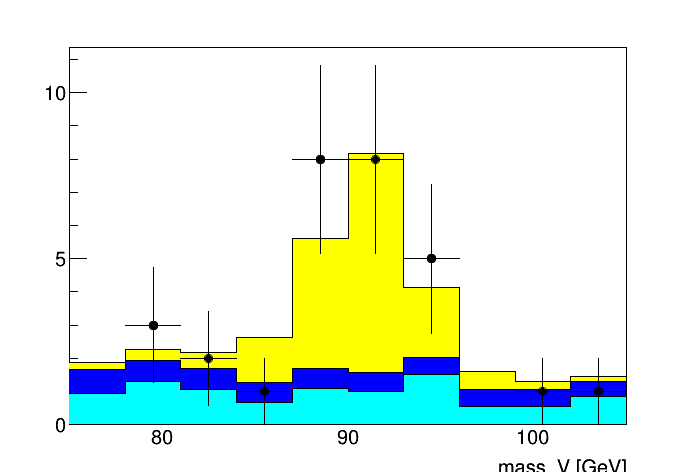

In [86]:
print(SF_0.value * data.Integral()/test_TT_hist_new.Integral())
print(SF_1.value * data.Integral()/test_DY_hist_new.Integral())
print(ERR_0.value * data.Integral()/test_TT_hist_new.Integral())
print(ERR_1.value * data.Integral()/test_DY_hist_new.Integral())

sf_0 = SF_0.value * data.Integral()/test_TT_hist_new.Integral()
sf_1 = SF_1.value * data.Integral()/test_DY_hist_new.Integral()

hs = R.THStack("stack","V_mass_Z")

# hs.Add(h_Other_4b)
# h_Other_4b.SetFillColor(800)

hs.Add(h_TTBB_4b*sf_0)
h_TTBB_4b.SetFillColor(432)

hs.Add(h_TT_4b*sf_0)
h_TT_4b.SetFillColor(600)

hs.Add(h_DY_4b*sf_1)
h_DY_4b.SetFillColor(400)

h_Data_4b.SetMarkerSize(1)
h_Data_4b.SetMarkerStyle(20)
h_Data_4b.Sumw2()

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
h_Data_4b.Draw()
hs.Draw('histSAME')
h_Data_4b.Draw('SAME')
hs.Draw('histSAME')
h_Data_4b.Draw('SAME')
c.Draw()